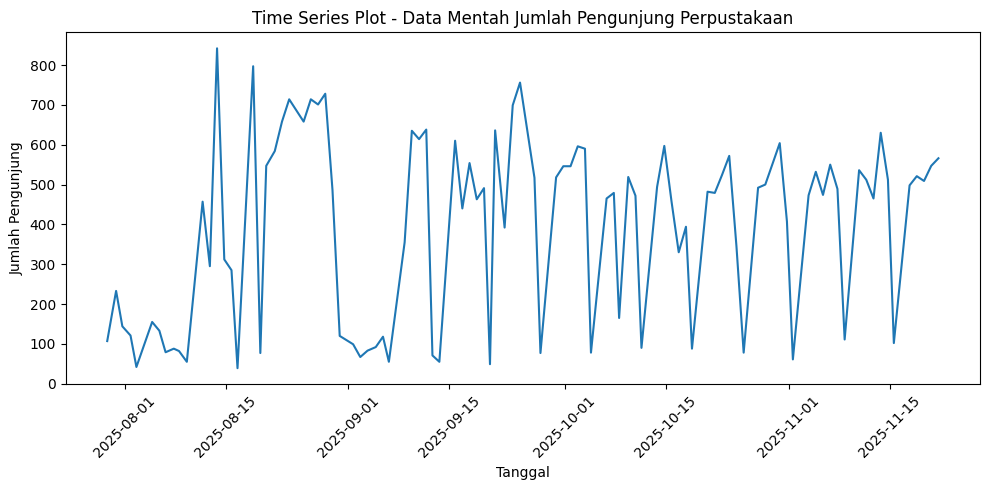

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('data_pengunjung_perpustakaan.xlsx')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.sort_values('Tanggal').reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(df['Tanggal'], df['Jumlah_Pengunjung'])
plt.title("Time Series Plot - Data Mentah Jumlah Pengunjung Perpustakaan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("data_pengunjung_perpustakaan.xlsx")
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.sort_values('Tanggal').reset_index(drop=True)

# Rename for simplicity
df['Actual'] = df['Jumlah_Pengunjung']
data = df['Actual']

# ================================
# Moving Average Models
# ================================
df['MA3'] = data.rolling(window=3).mean()
df['MA5'] = data.rolling(window=5).mean()

# Weighted MA (0.5, 0.3, 0.2)
weights = np.array([0.5, 0.3, 0.2])
def wma(series):
    return np.sum(weights * series[::-1])
df['WMA'] = data.rolling(window=3).apply(wma, raw=True)

# ================================
# Error per model
# ================================
df['Error_MA3'] = df['Actual'] - df['MA3']
df['Error_MA5'] = df['Actual'] - df['MA5']
df['Error_WMA'] = df['Actual'] - df['WMA']

# ================================
# RMSE & MAPE functions
# ================================
def mape(actual, forecast):
    mask = ~np.isnan(forecast)
    actual = actual[mask]
    forecast = forecast[mask]
    return np.mean(np.abs((actual - forecast) / actual)) * 100

def rmse(errors):
    return np.sqrt(np.nanmean(errors ** 2))

# ================================
# RMSE & MAPE per model
# ================================
rmse_ma3 = rmse(df['Error_MA3'])
rmse_ma5 = rmse(df['Error_MA5'])
rmse_wma = rmse(df['Error_WMA'])

mape_ma3 = mape(df['Actual'], df['MA3'])
mape_ma5 = mape(df['Actual'], df['MA5'])
mape_wma = mape(df['Actual'], df['WMA'])

results = pd.DataFrame({
    'Model': ['MA3', 'MA5', 'WMA'],
    'RMSE': [rmse_ma3, rmse_ma5, rmse_wma],
    'MAPE (%)': [mape_ma3, mape_ma5, mape_wma]
})

print("\n==============================")
print("📊 RMSE & MAPE Per Model")
print("==============================")
print(results)

# ================================
# Best Model by RMSE
# ================================
best_model = results.loc[results['RMSE'].idxmin(), 'Model']
print(f"\n🏆 Best Model berdasarkan RMSE terkecil: {best_model}")

# ================================
# Forecast Functions
# ================================
def forecast_MA(values, n, window):
    vals = values.copy()
    forecasts = []
    for _ in range(n):
        f = vals[-window:].mean()
        forecasts.append(f)
        vals = pd.concat([vals, pd.Series([f])])
    return forecasts

def forecast_WMA(values, n):
    vals = values.copy()
    forecasts = []
    for _ in range(n):
        f = np.sum(weights * vals[-3:].values[::-1])
        forecasts.append(f)
        vals = pd.concat([vals, pd.Series([f])])
    return forecasts

# ================================
# FORECAST 6 DAYS (All Models)
# Start date = 24 November 2025
# ================================
start_date = pd.to_datetime("2025-11-24")
future_dates = pd.date_range(start=start_date, periods=6)

fc_ma3 = forecast_MA(data, 6, 3)
fc_ma5 = forecast_MA(data, 6, 5)
fc_wma = forecast_WMA(data, 6)

forecast_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Forecast_MA3': np.round(fc_ma3).astype(int),
    'Forecast_MA5': np.round(fc_ma5).astype(int),
    'Forecast_WMA': np.round(fc_wma).astype(int)
}).set_index('Tanggal')

print("\n==============================")
print("🔮 Forecast 6 Hari (Semua Model)")
print("==============================")
print(forecast_df)

# ================================
# Forecast ONLY Best Model
# ================================
if best_model == "MA3":
    best_fc = fc_ma3
elif best_model == "MA5":
    best_fc = fc_ma5
else:
    best_fc = fc_wma

forecast_best = pd.DataFrame({
    "Tanggal": future_dates,
    f"Forecast_{best_model}": np.round(best_fc).astype(int)
}).set_index("Tanggal")

print("\n==============================")
print(f"🏆 Forecast 6 Hari — Best Model ({best_model})")
print("==============================")
print(forecast_best)



📊 RMSE & MAPE Per Model
  Model        RMSE   MAPE (%)
0   MA3  160.741303  75.750798
1   MA5  190.998236  99.280393
2   WMA  120.303924  55.807614

🏆 Best Model berdasarkan RMSE terkecil: WMA

🔮 Forecast 6 Hari (Semua Model)
            Forecast_MA3  Forecast_MA5  Forecast_WMA
Tanggal                                             
2025-11-24           541           528           549
2025-11-25           551           534           554
2025-11-26           553           537           555
2025-11-27           548           542           553
2025-11-28           551           542           554
2025-11-29           550           537           554

🏆 Forecast 6 Hari — Best Model (WMA)
            Forecast_WMA
Tanggal                 
2025-11-24           549
2025-11-25           554
2025-11-26           555
2025-11-27           553
2025-11-28           554
2025-11-29           554


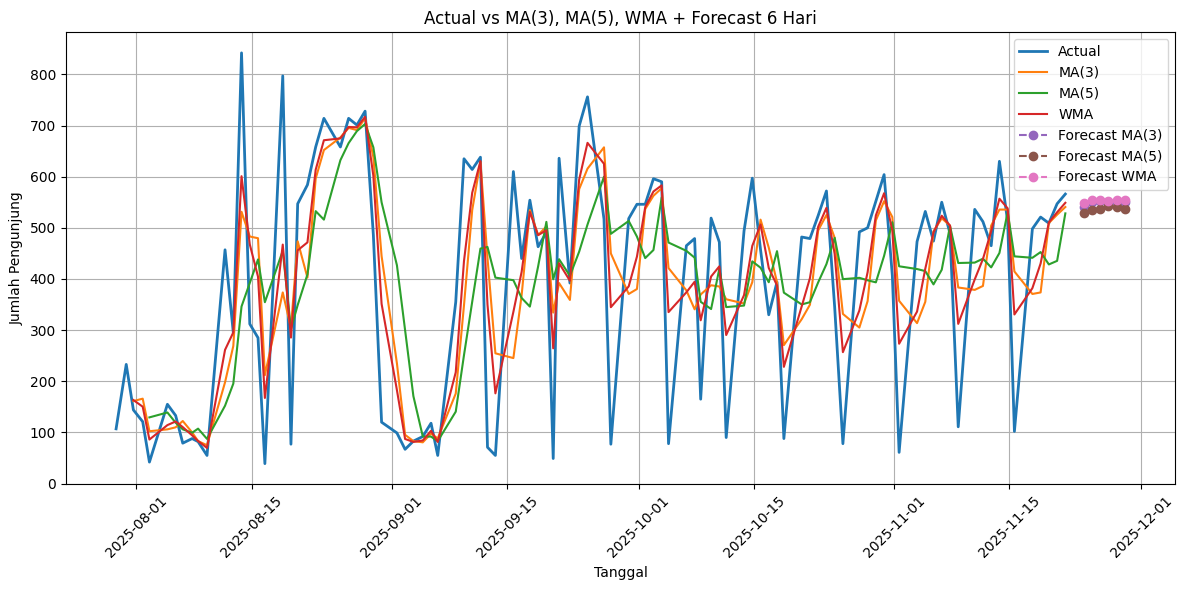


🔮 Forecast 6 Hari ke Depan:
     Tanggal  MA3_Forecast  MA5_Forecast  WMA_Forecast
0 2025-11-24    540.666667    528.200000    548.900000
1 2025-11-25    551.222222    534.240000    553.650000
2 2025-11-26    552.629630    536.888000    554.695000
3 2025-11-27    548.172840    542.465600    553.222500
4 2025-11-28    550.674897    541.558720    553.749750
5 2025-11-29    550.492455    536.670464    553.780625


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('data_pengunjung_perpustakaan.xlsx')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.sort_values('Tanggal').reset_index(drop=True)

df['Actual'] = df['Jumlah_Pengunjung']

# ================================
# Moving Averages
# ================================
df['MA3'] = df['Actual'].rolling(window=3).mean()
df['MA5'] = df['Actual'].rolling(window=5).mean()

# WMA
weights = np.array([0.5, 0.3, 0.2])
def wma(series):
    return np.sum(weights * series[::-1])
df['WMA'] = df['Actual'].rolling(window=3).apply(wma, raw=True)

# ================================
# FORECAST 6 HARI KE DEPAN
# Mulai 24 November 2025
# ================================
start_date = pd.to_datetime("2025-11-24")
future_dates = pd.date_range(start=start_date, periods=6)

actual_series = df['Actual'].copy()

# ---- Forecast MA3 ----
fc_ma3 = []
temp = actual_series.copy()
for _ in range(6):
    f = temp[-3:].mean()
    fc_ma3.append(f)
    temp = pd.concat([temp, pd.Series([f])])

# ---- Forecast MA5 ----
fc_ma5 = []
temp = actual_series.copy()
for _ in range(6):
    f = temp[-5:].mean()
    fc_ma5.append(f)
    temp = pd.concat([temp, pd.Series([f])])

# ---- Forecast WMA ----
fc_wma = []
temp = actual_series.copy()
for _ in range(6):
    f = np.sum(weights * temp[-3:].values[::-1])
    fc_wma.append(f)
    temp = pd.concat([temp, pd.Series([f])])

# ================================
# Gabungkan forecast ke DF baru
# ================================
forecast_df = pd.DataFrame({
    "Tanggal": future_dates,
    "MA3_Forecast": fc_ma3,
    "MA5_Forecast": fc_ma5,
    "WMA_Forecast": fc_wma
})

# Gabung ke plot: extend tanggal
plot_df = pd.concat([df[['Tanggal','Actual','MA3','MA5','WMA']], forecast_df], ignore_index=True)

# ================================
# PLOT 1: Actual + MA3, MA5, WMA + FORECAST
# ================================
plt.figure(figsize=(12,6))
plt.plot(df['Tanggal'], df['Actual'], label='Actual', linewidth=2)

# MA lines
plt.plot(df['Tanggal'], df['MA3'], label='MA(3)')
plt.plot(df['Tanggal'], df['MA5'], label='MA(5)')
plt.plot(df['Tanggal'], df['WMA'], label='WMA')

# Forecast lines — dashed
plt.plot(forecast_df['Tanggal'], forecast_df['MA3_Forecast'], 'o--', label='Forecast MA(3)')
plt.plot(forecast_df['Tanggal'], forecast_df['MA5_Forecast'], 'o--', label='Forecast MA(5)')
plt.plot(forecast_df['Tanggal'], forecast_df['WMA_Forecast'], 'o--', label='Forecast WMA')

plt.legend()
plt.title("Actual vs MA(3), MA(5), WMA + Forecast 6 Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ================================
# PRINT FORECAST
# ================================
print("\n🔮 Forecast 6 Hari ke Depan:")
print(forecast_df)
